# Step 1 - Dataset

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [17]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [18]:
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]
data = pd.DataFrame(data, columns=column_names)
data["MEDV"] = target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Checking for the null values

In [19]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Droping columns which are not required

In [20]:
data = data.drop(columns = ['B','LSTAT'])

In [21]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,22.0


# 2. Feature Processing

**Applying Standardization**
- The features will be transformed with mean as zero and Standard Deviation as 1

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
scaled_data = scaler.fit_transform(data.iloc[:,:-1])

In [24]:
scaled_data

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -0.98284286,
        -0.66660821, -1.45900038],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.8678825 ,
        -0.98732948, -0.30309415],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.8678825 ,
        -0.98732948, -0.30309415],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ..., -0.98284286,
        -0.80321172,  1.17646583],
       [-0.40776407, -0.48772236,  0.11573841, ..., -0.98284286,
        -0.80321172,  1.17646583],
       [-0.41500016, -0.48772236,  0.11573841, ..., -0.98284286,
        -0.80321172,  1.17646583]])

In [25]:
dataset = pd.DataFrame(scaled_data, columns = data.columns[:-1])

In [26]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032
...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466


In [27]:
dataset['Target'] = data['MEDV']

In [28]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Target
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,22.4
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,20.6
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,23.9
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,22.0


# Exploratory Data Analysis

# Checking the Correlation between the Features

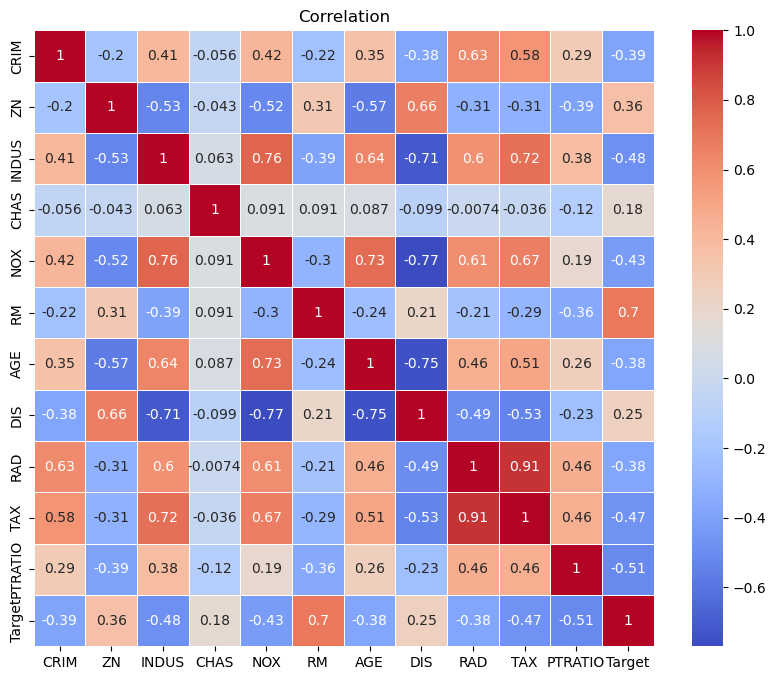

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm',linewidths=0.5)
plt.title("Correlation")
plt.show()

In [30]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,Target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.468536


# Pairplot

C:\Users\rtaru\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


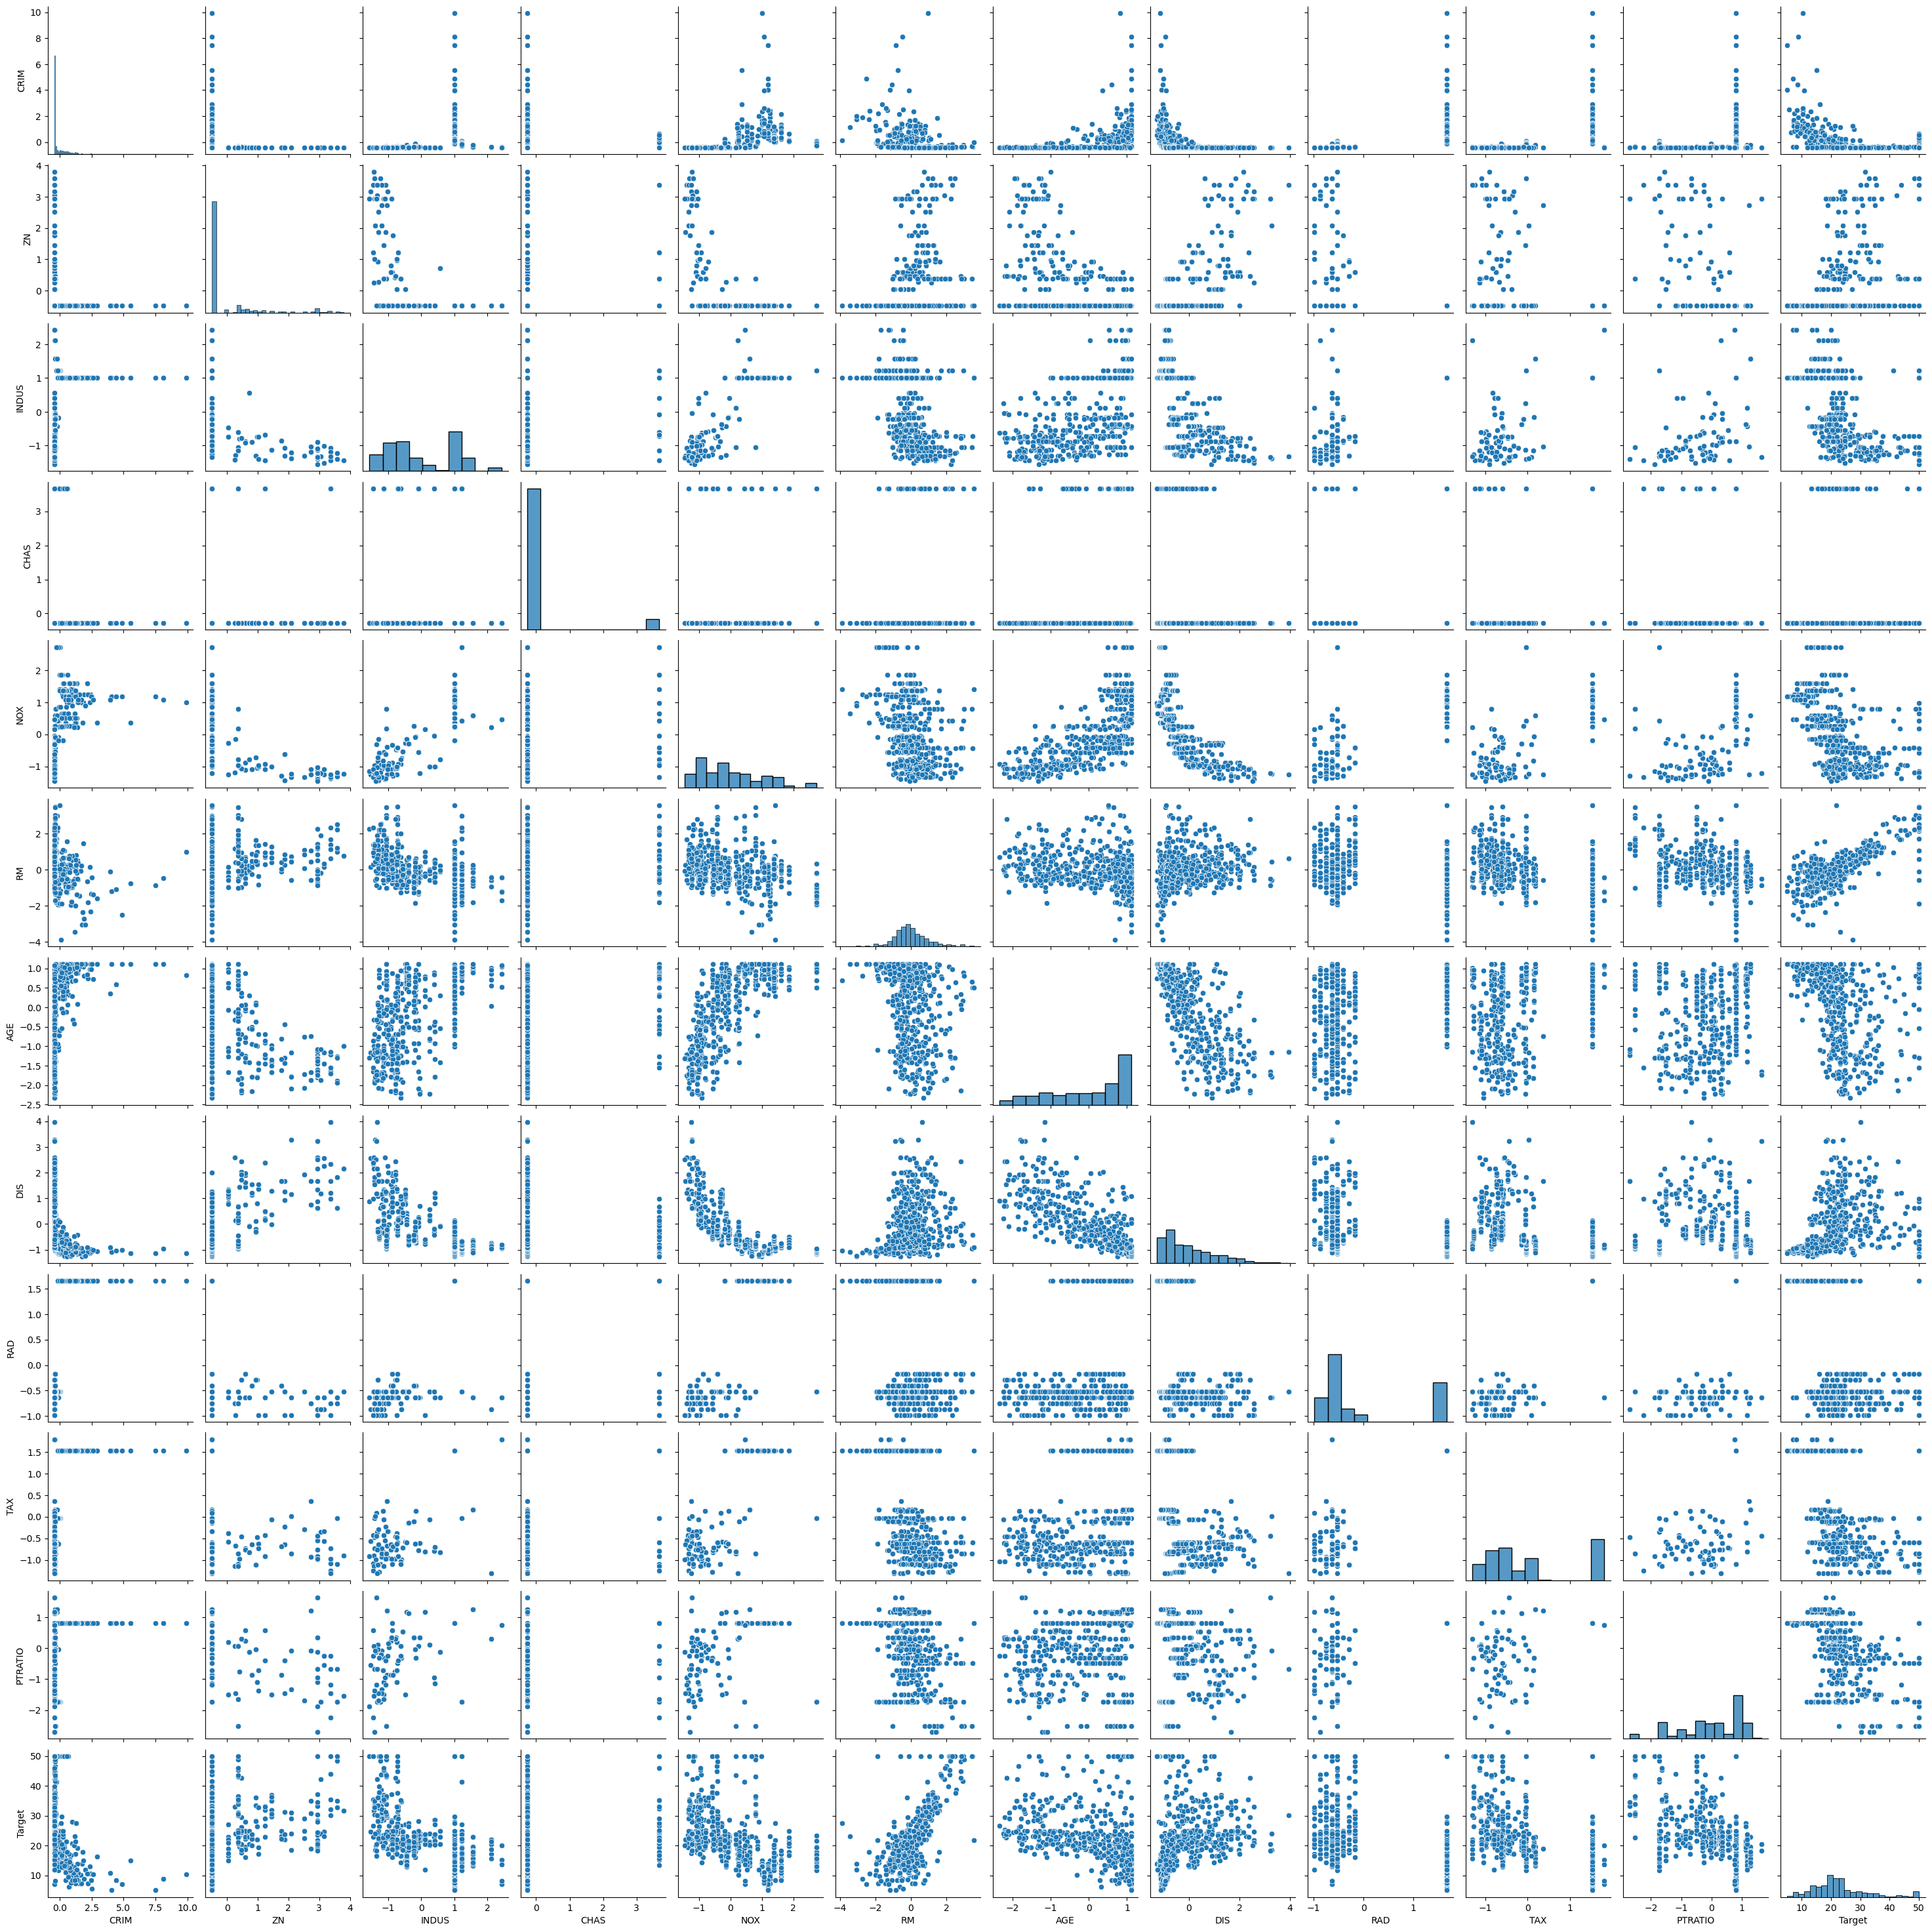

In [31]:
sns.pairplot(dataset)

# BoxPlot 

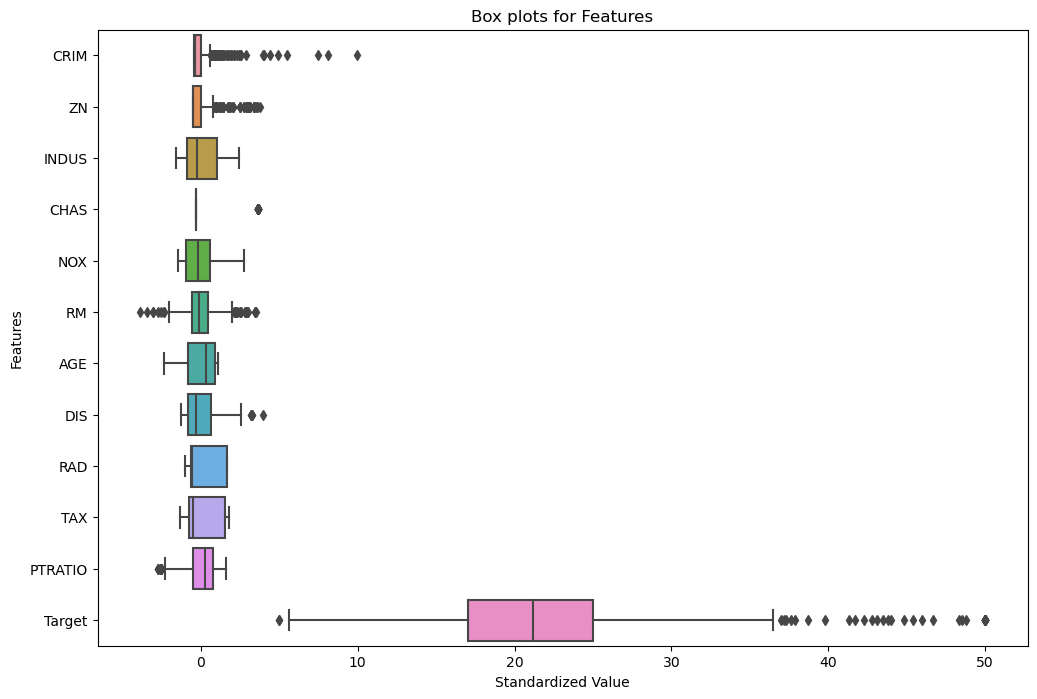

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(dataset, orient="h")
plt.title("Box plots for Features")
plt.xlabel("Standardized Value")
plt.ylabel("Features")
plt.show()

# Splitting data into Training, Validation set and Testing

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(dataset.drop(columns=['Target']), dataset['Target'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (354, 11) (354,)
Validation set shape: (76, 11) (76,)
Test set shape: (76, 11) (76,)


In [35]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
5,-0.417044,-0.487722,-1.306878,-0.272599,-0.835284,0.207096,-0.351157,1.077737,-0.752922,-1.106115,0.113032
116,-0.405205,-0.487722,-0.164408,-0.272599,-0.066472,-0.154767,0.139579,-0.506241,-0.408041,0.141134,-0.303094
45,-0.400569,-0.487722,-0.616727,-0.272599,-0.921667,-0.858548,-1.236615,0.620527,-0.752922,-1.040783,-0.256858
16,-0.297868,-0.487722,-0.437258,-0.272599,-0.144217,-0.498110,-1.396638,0.334449,-0.637962,-0.601276,1.176466
468,1.392077,-0.487722,1.015999,-0.272599,0.218592,-0.510932,0.086238,-0.421483,1.661245,1.530926,0.806576
...,...,...,...,...,...,...,...,...,...,...,...
106,-0.400594,-0.487722,-0.375976,-0.272599,-0.299707,-0.639151,0.829454,-0.753005,-0.523001,-0.143951,1.130230
270,-0.385703,0.370669,-0.609431,-0.272599,-0.783454,-0.610658,-0.941463,0.301364,-0.752922,-1.100176,0.066796
348,-0.418771,2.945843,-1.331682,-0.272599,-1.033965,0.499151,-1.382414,2.162434,-0.637962,-0.761637,-0.672984
435,0.878254,-0.487722,1.015999,-0.272599,1.600725,0.490603,0.925467,-0.794029,1.661245,1.530926,0.806576


In [36]:
y_temp

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: Target, Length: 152, dtype: float64

# Algorithm Implementation

In [37]:
def distance(point1, point2):
    if len(point1) != len(point2):
        return 'error'
    
    dimentionality = len(point1)
    dist = 0
    
    for i in range(dimentionality):
        dist += (point1[i] - point2[i])**2
        
    dist = dist**(0.5)
    return dist

def dist_array(point, X, y):
    arr = []
    
    
    for i, p in enumerate(X):
        if distance(point,p) == 'error':
            return 'error'
        else:
            arr.append(distance(point,p))
        
    df_temp = pd.DataFrame(X)
    df_temp['y'] = y
    df_temp['dist'] = arr
        
    return df_temp.sort_values('dist')

In [38]:
def prediction(df_temp, k):
    df_top_k = df_temp.head(k)
    y_predicted = df_top_k['y'].mean()
    return y_predicted

In [39]:
def KNN_Regression(X_train, y_train, points,k):
    y_pred = []
    for point in points.values:
        dist = dist_array(point, X_train.values, y_train.values)
        pred = prediction(dist,k)
        y_pred.append(pred)
    return y_pred

In [40]:
k = [3,5,7,10]
def Knn_Algo(x_train, y_train, points, test_data):
    k_values_Val = []
    for i in k:
        y_pred = KNN_Regression(x_train, y_train, points,i)
        mse = mean_squared_error(test_data, y_pred)
        k_values_Val.append(mse)
        mae = mean_absolute_error(test_data, y_pred)
        r_score = r2_score(test_data, y_pred)
        print("Mean Squared Error (MSE) for k value = {} is {}".format(i, mse))
        print("Mean Absolute Error (MAE) for k value = {} is {}".format(i, mae))
        print("R2_Score for k value = {} is {}".format(i, r_score))
        print("\n")
    return k_values_Val

# 1. Model Evaluation without Weighted Distance

# Performance Metrics for Validation data

In [41]:
values = Knn_Algo(X_train, y_train, X_val, y_val)

Mean Squared Error (MSE) for k value = 3 is 8.33407894736842
Mean Absolute Error (MAE) for k value = 3 is 2.1741228070175436
R2_Score for k value = 3 is 0.8798604256114391


Mean Squared Error (MSE) for k value = 5 is 11.189910526315785
Mean Absolute Error (MAE) for k value = 5 is 2.4034210526315785
R2_Score for k value = 5 is 0.8386923022246927


Mean Squared Error (MSE) for k value = 7 is 11.437328141783027
Mean Absolute Error (MAE) for k value = 7 is 2.517481203007519
R2_Score for k value = 7 is 0.8351256637027655


Mean Squared Error (MSE) for k value = 10 is 13.376903947368422
Mean Absolute Error (MAE) for k value = 10 is 2.6564473684210532
R2_Score for k value = 10 is 0.8071657879625724




In [42]:
values

[8.33407894736842, 11.189910526315785, 11.437328141783027, 13.376903947368422]

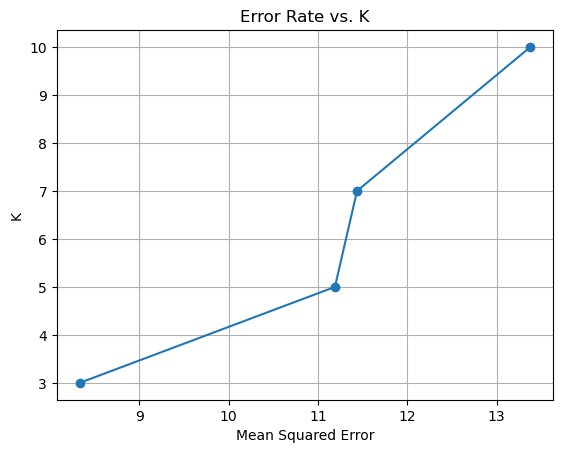

In [44]:
plt.plot(values,k , marker='o')
plt.xlabel('Mean Squared Error')
plt.ylabel('K')
plt.title('Error Rate vs. K')
plt.grid(True)
plt.show()

# Performance Metrics for Testing data

In [45]:
y_test_preds = KNN_Regression(X_train, y_train, X_test,3)

In [46]:
mse = mean_squared_error(y_test, y_test_preds)
r_score = r2_score(y_test, y_test_preds)
print("Mean Squared Error (MSE) for k value = {} is {}".format(3, mse))
print("R2_Score for k value = {} is {}".format(3, r_score))

Mean Squared Error (MSE) for k value = 3 is 37.54614035087718
R2_Score for k value = 3 is 0.5275988761114434


# 2. Model Evaluation with Weighted Distance

In [47]:
def dist_array_weighted(point, X, y, power):
    arr = []
    w = []
    
    
    for i, p in enumerate(X):
        if distance(point,p) == 'error':
            return 'error'
        else:
            arr.append(distance(point,p))
            w.append(1/(distance(point, p)**power))
        
    df_temp = pd.DataFrame(X)
    df_temp['y'] = y
    df_temp['dist'] = arr
    df_temp['w'] = w
        
    return df_temp.sort_values('dist')

In [48]:
def Weighted_prediction(df_temp, k):
    df_top_k = df_temp.head(k)
    """
    Weighted Prediction_y = Sum of (Wi * Yi) / Sum (Wi)
    """
    # Calculating sum of weights * y -> Numerator of the formula
    Sum_of_weighted_y = np.sum(df_top_k['y'] * df_top_k['w'])
    # Calculating sum of weights -> denominator
    sum_of_weights = np.sum(df_top_k['w'])
    y_predicted = Sum_of_weighted_y / sum_of_weights
    return y_predicted

In [49]:
def Weighted_KNN_Regression(X_train, y_train, points,k,power):
    y_pred = []
    for point in points.values:
        dist = dist_array_weighted(point, X_train.values, y_train.values,power)
        pred = Weighted_prediction(dist,k)
        y_pred.append(pred)
    return y_pred

In [50]:
k = [3,5,7,10]
def Weighted_Knn_Algo(x_train, y_train, points, power, test_data):
    k_values_test = []
    for i in k:
        y_pred = Weighted_KNN_Regression(x_train, y_train, points,i,power)
        mse = mean_squared_error(test_data, y_pred)
        k_values_test.append(mse)
        mae = mean_absolute_error(test_data, y_pred)
        r_score = r2_score(test_data, y_pred)
        print("Mean Squared Error (MSE) for k value = {} is {}".format(i, mse))
        print("Mean Absolute Error (MAE) for k value = {} is {}".format(i, mae))
        print("R2_Score for k value = {} is {}".format(i, r_score))
        print("\n")
    return k_values_test

# Performance Metrics for Validation data

In [51]:
preds_test = Weighted_Knn_Algo(X_train, y_train, X_val, 2,  y_val)

Mean Squared Error (MSE) for k value = 3 is 7.725383858831099
Mean Absolute Error (MAE) for k value = 3 is 2.0928422640072264
R2_Score for k value = 3 is 0.8886350447782484


Mean Squared Error (MSE) for k value = 5 is 8.426599010189003
Mean Absolute Error (MAE) for k value = 5 is 2.075485724879968
R2_Score for k value = 5 is 0.878526706427848


Mean Squared Error (MSE) for k value = 7 is 8.478078807886776
Mean Absolute Error (MAE) for k value = 7 is 2.1409323226524632
R2_Score for k value = 7 is 0.8777846015085069


Mean Squared Error (MSE) for k value = 10 is 9.48934454549044
Mean Absolute Error (MAE) for k value = 10 is 2.2354512570785277
R2_Score for k value = 10 is 0.8632067416062077




In [52]:
preds_test

[7.725383858831099, 8.426599010189003, 8.478078807886776, 9.48934454549044]

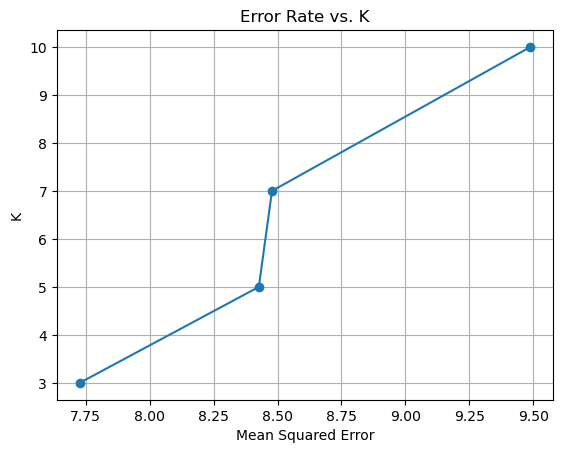

In [53]:
plt.plot(preds_test,k , marker='o')
plt.xlabel('Mean Squared Error')
plt.ylabel('K')
plt.title('Error Rate vs. K')
plt.grid(True)
plt.show()

# Performance Metrics for Testing data

In [54]:
weighted_preds = Weighted_KNN_Regression(X_train, y_train, X_test,3,2)

In [55]:
mse = mean_squared_error(y_test, weighted_preds)
r_score = r2_score(y_test, weighted_preds)
print("Mean Squared Error (MSE) for k value = {} is {}".format(3, mse))
print("R2_Score for k value = {} is {}".format(3, r_score))

Mean Squared Error (MSE) for k value = 3 is 34.77018661633538
R2_Score for k value = 3 is 0.5625255996522704


# Overall Conculsion

- Weighted KNN generally performs better than non-weighted KNN in terms of MSE, MAE, and R2 Score on both the validation and testing sets across different k values.

- The R2 scores for weighted KNN are consistently higher compared to non-weighted KNN, indicating better model performance.

- As k increases, the performance tends to degrade slightly, which is expected as the model becomes less flexible and smooth.

- The differences in performance between validation and testing sets are consistent across both weighted and non-weighted KNN, suggesting no significant overfitting or underfitting issues.

- Overall, weighted KNN seems to be a better choice for this dataset with optimal k value as 3